# 독성 예측

1. TDC 데이터 시각화
2. 심장독성 예측 모델 만들기, 성능평가
  - 2D Descriptors
  - ECFP
  - ChemBERTa-2

3. DeepChem을 이용한 GNN 모델 실습
4. ZINC Clean Leads dataset 소개
5. 가상 스크리닝 실습

In [1]:
# Dependencies 설치
!pip -q install PyTDC
!pip -q install rdkit-pypi
!pip install -U accelerate
!pip install -U transformers
!pip install datasets
!pip install --pre deepchem

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 19.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.0/777.0 kB 17.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 11.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.3/121.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━

## 1. TDC data visualizing

In [1]:
# TCD를 이용하면 신약개발에 필요한 데이터를 쉽게 다운받을 수 있다.
from tdc.single_pred import ADME
data = ADME(name="Caco2_Wang")

Found local copy...
Loading...
Done!


In [2]:
dir(data)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'balanced',
 'binarize',
 'convert_format',
 'convert_from_log',
 'convert_result',
 'convert_to_log',
 'entity1',
 'entity1_idx',
 'entity1_name',
 'file_format',
 'get_approved_set',
 'get_data',
 'get_label_meaning',
 'get_other_species',
 'get_split',
 'harmonize',
 'label_distribution',
 'label_name',
 'name',
 'path',
 'print_stats',
 'raw_format',
 'y']

In [3]:
data.get_data()

,Drug_ID,Drug,Y
0,(-)-epicatechin,Oc1cc(O)c2c(c1)OC(c1ccc(O)c(O)c1)C(O)C2,-6.220000
1,"(2E,4Z,8Z)-N-isobutyldodeca-2,4,10-triene-8 -y...",C/C=C\C#CCC/C=C\C=C\C(=O)NCC(C)C,-3.860000
2,codeine,COc1ccc2c3c1O[C@H]1[C@@H](O)C=C[C@H]4[C@@H](C2...,-4.090000
3,creatinine,CN1CC(=O)NC1=N,-5.935409
4,danazol,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=Cc5oncc5C[C@]4(...,-4.840000
...,...,...,...
905,Capric acid (decanoic acid),CCCCCCCCCC(=O)O,-4.680000
906,Apometzgerin (2),COc1cc(-c2cc(=O)c3c(O)cc(O)cc3o2)cc(O)c1OC,-4.950000
907,3,COC(=O)C[C@@H](C(=O)NN(Cc1ccc(/C=C\c2ccccc2)cc...,-5.080000
908,51d,COc1ccc2c(O[C@@H]3C[C@H]4C(=O)N[C@]5(C(=O)NS(=...,-5.300000


In [4]:
# 모델의 평가를 위해 데이터를 split 하는 것도 간단
split = data.get_split(method="scaffold",
                       seed = 42,
                       frac = [0.7, 0.1, 0.2])
split["train"].head(2)

100%|██████████| 910/910 [00:00<00:00, 2310.81it/s]


,Drug_ID,Drug,Y
0,H 95/71,CC(C)NCC(O)COc1ccc(NC=O)cc1,-5.427984
1,H 244/45,CCC(=O)Nc1ccc(OCC(O)CNC(C)C)cc1,-5.219842


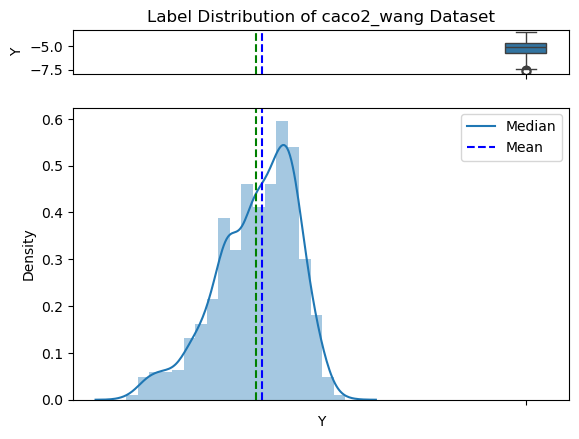

In [5]:
# data의 distribution의 즉각적인 시각화도 가능
data.label_distribution()

Binariztion using threshold -4.7, default, we assume the smaller values are 1 and larger ones is 0, you can change the order by 'binarize(order = 'ascending')'


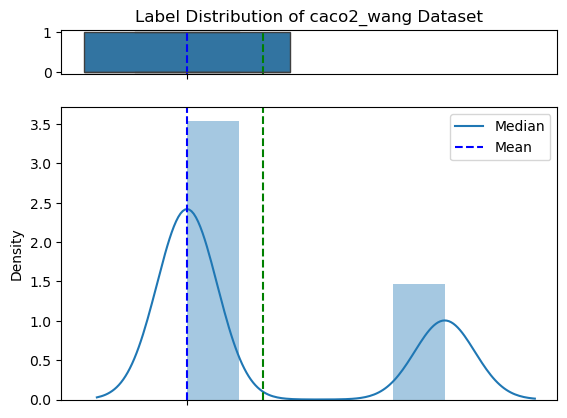

In [6]:
# 연속형 변수를 이산형으로 쉽게 전환 가능
data.binarize(threshold= -4.7, order="ascending")
data.label_distribution()

## 2. 심장독성 예측 모델 만들기

In [7]:
from tdc.single_pred import Tox
data = Tox(name="hERG")
data.get_data().head(2)

Downloading...
100%|██████████| 50.2k/50.2k [00:00<00:00, 121kiB/s] 
Loading...
Done!


,Drug_ID,Drug,Y
0,DEMETHYLASTEMIZOLE,Oc1ccc(CCN2CCC(Nc3nc4ccccc4n3Cc3ccc(F)cc3)CC2)cc1,1.0
1,GBR-12909,Fc1ccc(C(OCC[NH+]2CC[NH+](CCCc3ccccc3)CC2)c2cc...,1.0


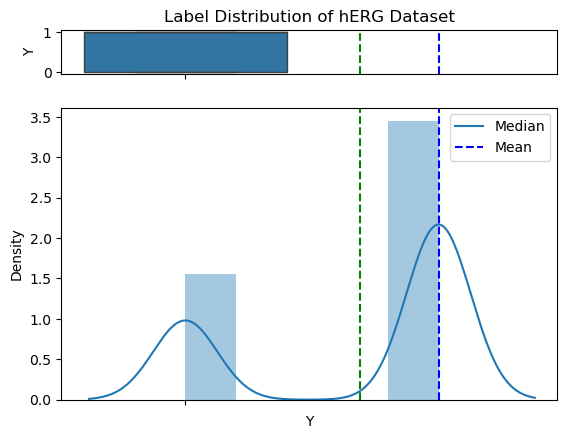

In [8]:
data.label_distribution()

In [9]:
# 빠른 학습을 위해 일부 데이터만 이용
split = data.get_split(method = "scaffold",
                       seed = 42,
                       frac = [0.3, 0, 0.1])

100%|██████████| 655/655 [00:00<00:00, 2527.24it/s]


## 2-1 RDKit 다루기

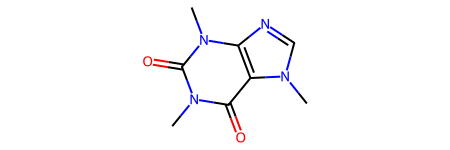

In [10]:
import rdkit.Chem as Chem
smiles = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"
m = Chem.MolFromSmiles(smiles)
m

In [11]:
from rdkit.Chem import Descriptors
print(len(Descriptors._descList))
for k in Descriptors._descList[:10]:
    print(k)

210
('MaxAbsEStateIndex', <function MaxAbsEStateIndex at 0x7fa2e362cd30>)
('MaxEStateIndex', <function MaxEStateIndex at 0x7fa2e362cc10>)
('MinAbsEStateIndex', <function MinAbsEStateIndex at 0x7fa2e362cdc0>)
('MinEStateIndex', <function MinEStateIndex at 0x7fa2e362cca0>)
('qed', <function qed at 0x7fa2e35f0d30>)
('SPS', <function SPS at 0x7fa2e35d7310>)
('MolWt', <function <lambda> at 0x7fa2e35d7940>)
('HeavyAtomMolWt', <function HeavyAtomMolWt at 0x7fa2e35d79d0>)
('ExactMolWt', <function <lambda> at 0x7fa2e35d7a60>)
('NumValenceElectrons', <function NumValenceElectrons at 0x7fa2e35d7af0>)


In [12]:
from rdkit.ML.Descriptors import MoleculeDescriptors
import numpy as np
def get_all_descriptors(m):
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    ds = calc.CalcDescriptors(m)
    ds = np.array(ds)
    ds[np.isnan(ds)] = 0
    return np.array(ds)

In [13]:
des = get_all_descriptors(m)
print(des.shape)
print(des[:10])

(210,)
[ 11.67203704  11.67203704   0.31657407  -0.36         0.53846283
  11.07142857 194.194      184.114      194.08037556  74.        ]


In [16]:
def data_processing_desc(df):
    X = np.vstack(df.Drug.apply(lambda m: get_all_descriptors(Chem.MolFromSmiles(m))))
    y = df['Y'].to_numpy()
    return X, y

X_train, y_train = data_processing_desc(split['train'])
X_test, y_test = data_processing_desc(split['test'])

In [17]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((196, 210), (196,)), ((459, 210), (459,)))

## 2-2 random forest를 이용한 머신러닝 모델 만들기

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_test)[:, 1]

In [27]:
# 평가 지표 설정
from sklearn import metrics
def eval_model(y_test, y_pred):
    print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred > 0.5)}")
    print(f"Log loss: {metrics.log_loss(y_test, y_pred, labels=[0, 1])}")
    precision, recall, _ = metrics.precision_recall_curve(y_test, y_pred, pos_label=1)
    print(f"AUPRC: {metrics.auc(recall, precision)}")
    fpr_roc, tpr_roc, _ = metrics.roc_curve(y_test, y_pred, pos_label=1)
    print(f"AUROC: {metrics.auc(fpr_roc, tpr_roc)}")

In [28]:
eval_model(y_test, y_pred)

Accuracy: 0.7995642701525054
Log loss: 0.4915935911927304
AUPRC: 0.8673487832780042
AUROC: 0.8012173990314126


## 2-3 ECFP를 이용한 머신러닝 모델 만들기

In [29]:
import rdkit.Chem.AllChem as AllChem
def data_processing_ECFP(df):
    X = np.vstack(df.Drug.apply(lambda m: list(AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(m), 4, nBits=2048))))
    y = df['Y'].to_numpy()
    return X, y

X_train, y_train = data_processing_ECFP(split['train'])
X_test, y_test = data_processing_ECFP(split['test'])

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)[:, 1]

eval_model(y_test, y_pred)

Accuracy: 0.7581699346405228
Log loss: 0.5495752106270716
AUPRC: 0.8365761508871044
AUROC: 0.7427911316479318


## 2-4 ChemBERTa를 이용한 BERT-based 모델 만들기 (1): BERT + Random forest

In [30]:
from transformers import AutoConfig, AutoTokenizer, AutoModel, Trainer, TrainingArguments, TrainerCallback

model_name = "DeepChem/ChemBERTa-77M-MTR"
tokenizer = AutoTokenizer.from_pretrained(model_name)
config = AutoConfig.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

tokenizer_config.json: 100%|██████████| 1.27k/1.27k [00:00<00:00, 113kB/s]
config.json: 100%|██████████| 17.7k/17.7k [00:00<00:00, 1.94MB/s]
vocab.json: 100%|██████████| 6.96k/6.96k [00:00<00:00, 2.66MB/s]
merges.txt: 100%|██████████| 52.0/52.0 [00:00<00:00, 22.9kB/s]
tokenizer.json: 100%|██████████| 8.26k/8.26k [00:00<00:00, 2.99MB/s]
added_tokens.json: 100%|██████████| 25.0/25.0 [00:00<00:00, 11.7kB/s]
special_tokens_map.json: 100%|██████████| 420/420 [00:00<00:00, 199kB/s]
pytorch_model.bin: 100%|██████████| 14.0M/14.0M [00:01<00:00, 7.22MB/s]
Some weights of RobertaModel were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [31]:
import torch
def data_processing_BERT(df):
    smiles = df['Drug']
    ids = np.array(tokenizer(list(smiles), padding='max_length', max_length=512, truncation=True)['input_ids'])
    bert_output = model(torch.tensor(ids))[0]
    clf_output = bert_output[:, 0, :]
    X = clf_output.detach().numpy()
    y = df['Y'].to_numpy()
    return X, y

X_train, y_train = data_processing_BERT(split['train'])
X_test, y_test = data_processing_BERT(split['test'])

In [32]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((196, 384), (196,)), ((459, 384), (459,)))

In [33]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)[:, 1]

eval_model(y_test, y_pred)

Accuracy: 0.7668845315904139
Log loss: 0.5160530810447368
AUPRC: 0.8658769156938296
AUROC: 0.7745368107699826


## 2-5.ChemBERTa를 이용한 BERT-based 모델 만들기(2): BERT + DNN

In [34]:
# Define dastaset and dataloader
from torch.utils.data import Dataset, DataLoader
from transformers import AutoConfig, AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, TrainerCallback
class BERTDataset(Dataset):
    def __init__(self, df):
        self.data = df
        self.data['ids'] = self.smiles_to_ids(df['Drug'])
        self.data['y'] = df['Y'].astype('float32')

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        return {'input_ids':row['ids'], 'labels':row['y']}

    def smiles_to_ids(self, smiles):
        ids = tokenizer(list(smiles), padding='max_length', max_length=512, truncation=True)['input_ids']
        return ids

# datasets
train_dataset = BERTDataset(split['train'])
test_dataset = BERTDataset(split['test'])

In [35]:
# 모델 정의
model_name = "DeepChem/ChemBERTa-77M-MTR"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1)

# if GPU
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU.")
else:
    print("No GPU available, using the CPU instead.")
    device = torch.device("cpu")

# move model to the device
model.to(device)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Using GPU.


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(600, 384, padding_idx=1)
      (position_embeddings): Embedding(515, 384, padding_idx=1)
      (token_type_embeddings): Embedding(1, 384)
      (LayerNorm): LayerNorm((384,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.144, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-2): 3 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=384, out_features=384, bias=True)
              (key): Linear(in_features=384, out_features=384, bias=True)
              (value): Linear(in_features=384, out_features=384, bias=True)
              (dropout): Dropout(p=0.109, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=384, out_features=384, bias=True)
             

In [36]:
from transformers import TrainingArguments, Trainer

# TrainerArguments 클래스에 argument 정의
batch_size = 64
epochs = 15
training_args = TrainingArguments(
    output_dir = './outputs',
    logging_dir = './logs',
    num_train_epochs = epochs,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    logging_steps = epochs,
    save_steps= epochs,
    save_total_limit=1
)

# metrics 계산
from datasets import load_metric
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions
    preds = (preds > 0.5) * 1.0
    ma = load_metric('accuracy')
    mf = load_metric('f1')
    acc = ma.compute(predictions=preds, references=labels)['accuracy']
    f1 = mf.compute(predictions=preds, references=labels)['f1']
    return {'accuracy':acc, 'f1':f1}

In [37]:
# Trainer 클래스 정의 및 학습
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)
trainer.train()

Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Step,Training Loss
15,0.231100


TrainOutput(global_step=15, training_loss=0.23109723726908366, metrics={'train_runtime': 7.7091, 'train_samples_per_second': 381.368, 'train_steps_per_second': 1.946, 'total_flos': 27088546222080.0, 'train_loss': 0.23109723726908366, 'epoch': 15.0})

In [38]:
trainer.evaluate()

{'eval_loss': 0.2066788673400879,
 'eval_accuracy': 0.6840958605664488,
 'eval_f1': 0.811443433029909,
 'eval_runtime': 2.752,
 'eval_samples_per_second': 166.79,
 'eval_steps_per_second': 0.727,
 'epoch': 15.0}

## 3. DeepChem을 이용한 GNN 모델 실습

In [39]:
import deepchem as dc

tasks, datasets, transformers = dc.molnet.load_tox21(featurizer="GraphConv")
train_dataset, valid_dataset, test_dataset = datasets

No normalization for SPS. Feature removed!
No normalization for AvgIpc. Feature removed!
Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
Skipped loading some PyTorch models, missing a dependency. No module named 'torch_geometric'
No module named 'torch_geometric'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch_geometric'
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'pytorch_lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'
Skipped loading some PyTorch models, missing a dependency. No module named 'tensorflow'


In [44]:
!pip install tensorflow

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.6 MB/s eta 0:00:00
  Using cached libclang-16.0.6-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 53.0 MB/s eta 0:00:00a 0:00:01
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Using cached tensorflow_io_gcs_filesystem-0.34.0-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (14 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 kB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.6/479.6 MB 3.7 MB/s eta 0:00:0000:01m00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 12.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 

In [52]:
from deepchem.models.graph_models import GraphConvModel

ImportError: cannot import name 'KerasModel' from 'deepchem.models' (/home/dbsejrgus226/miniconda3/envs/laidd/lib/python3.8/site-packages/deepchem/models/__init__.py)

In [50]:
n_tasks = len(tasks)
model = dc.models(n_tasks, mode="classfication")
model.fit(train.dataset, nb_epoch=50)

TypeError: 'module' object is not callable